# Predicting effectiveness of drugs based on Decision Tree

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier

In [3]:
# reading dataset
df = pd.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/drug200.csv')
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


# Data normalization and Feature selection

In [4]:
df['Drug'].value_counts()

drugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64

In [9]:
df['BP'].value_counts()

HIGH      77
LOW       64
NORMAL    59
Name: BP, dtype: int64

In [10]:
df['Cholesterol'].value_counts()

HIGH      103
NORMAL     97
Name: Cholesterol, dtype: int64

In [12]:
x = df[['Age','Sex','Cholesterol','Na_to_K','BP']]
y = df[['Drug']]

# Preprocessing for Decision Tree

In [13]:
# creating dummy variables for Decision Tree
dt_sex = preprocessing.LabelEncoder()
dt_sex.fit(['F','M'])
x['Sex'] = dt_sex.transform(x['Sex'])

<ipython-input-13-f06ab1d8f05c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['Sex'] = dt_sex.transform(x['Sex'])


In [15]:
dt_bp = preprocessing.LabelEncoder()
dt_bp.fit(['LOW','NORMAL','HIGH'])
x['BP'] = dt_bp.transform(x['BP'])

<ipython-input-15-2aba5423d8a9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['BP'] = dt_bp.transform(x['BP'])


In [16]:
dt_c = preprocessing.LabelEncoder()
dt_c.fit(['NORMAL','HIGH'])
x['Cholesterol'] = dt_c.transform(x['Cholesterol'])

<ipython-input-16-d12f769369db>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['Cholesterol'] = dt_c.transform(x['Cholesterol'])


In [17]:
x.head()

,Age,Sex,Cholesterol,Na_to_K,BP
0,23,0,0,25.355,0
1,47,1,0,13.093,1
2,47,1,0,10.114,1
3,28,0,0,7.798,2
4,61,0,0,18.043,1


In [18]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=3)

# Decision Tree for Modeling

In [21]:
drugtree = DecisionTreeClassifier(criterion="entropy", max_depth = 6)
drugtree

DecisionTreeClassifier(criterion='entropy', max_depth=6)

In [22]:
drugtree.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6)

In [25]:
pred = drugtree.predict(x_test)
print(pred[0:5])
print(y_test.head())

['drugY' 'drugX' 'drugX' 'drugX' 'drugX']
      Drug
40   drugY
51   drugX
139  drugX
197  drugX
170  drugX


In [29]:
from sklearn import metrics
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, pred))

DecisionTrees's Accuracy:  0.9833333333333333


# Decision Tree Visualization

In [31]:
!pip install graphviz

In [32]:
!pip install pydotplus

Using legacy setup.py install for pydotplus, since package 'wheel' is not installed.
    Running setup.py install for pydotplus: started
    Running setup.py install for pydotplus: finished with status 'done'


In [34]:
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree

[Text(484.375, 475.65, 'Na_to_K <= 14.615\nentropy = 1.929\nsamples = 140\nvalue = [16, 11, 11, 33, 69]\nclass = drugB'),
 Text(387.5, 369.95, 'BP <= 0.5\nentropy = 1.832\nsamples = 71\nvalue = [16, 11, 11, 33, 0]\nclass = drugA'),
 Text(193.75, 264.25, 'Age <= 50.5\nentropy = 0.975\nsamples = 27\nvalue = [16, 11, 0, 0, 0]\nclass = drugY'),
 Text(96.875, 158.55, 'entropy = 0.0\nsamples = 16\nvalue = [16, 0, 0, 0, 0]\nclass = drugY'),
 Text(290.625, 158.55, 'entropy = 0.0\nsamples = 11\nvalue = [0, 11, 0, 0, 0]\nclass = drugX'),
 Text(581.25, 264.25, 'Cholesterol <= 0.5\nentropy = 0.811\nsamples = 44\nvalue = [0, 0, 11, 33, 0]\nclass = drugA'),
 Text(484.375, 158.55, 'BP <= 1.5\nentropy = 0.998\nsamples = 21\nvalue = [0, 0, 11, 10, 0]\nclass = drugC'),
 Text(387.5, 52.849999999999966, 'entropy = 0.0\nsamples = 11\nvalue = [0, 0, 11, 0, 0]\nclass = drugC'),
 Text(581.25, 52.849999999999966, 'entropy = 0.0\nsamples = 10\nvalue = [0, 0, 0, 10, 0]\nclass = drugA'),
 Text(678.125, 158.55, 'e

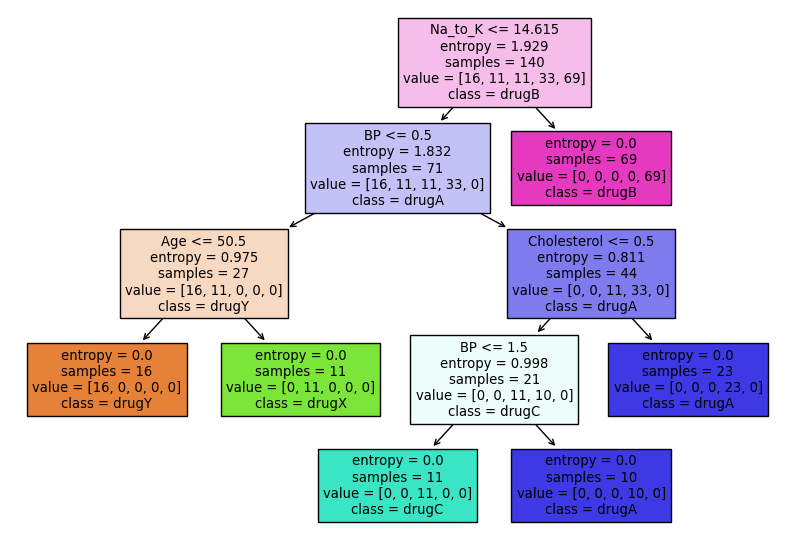

In [48]:
fn = x_test.columns[0:5]
cn = y_test['Drug'].unique().tolist()
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,7), dpi=100)
tree.plot_tree(drugtree,feature_names = fn, class_names=cn, filled = True)